# Week 8-1 텍스트 분류

In [1]:
import numpy as np
import pandas as pd
import os

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week8')
spam=pd.read_csv("spam.csv",encoding='latin1')

In [2]:
spam

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [5]:
spam['v1'] =spam['v1'].replace(['ham','spam'],[0,1])

In [6]:
spam.head()

v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...

In [7]:
spam.isnull().any() # null 존재 여부 확인

v1    False
v2    False
dtype: bool

In [8]:
spam['v1'].nunique() # 중복값 확인

2

In [9]:
spam['v2'].nunique() # 중복값 확인

5169

In [10]:
spam.drop_duplicates(subset=['v2'],inplace=True) # 중복제거

In [11]:
spam.shape

(5169, 2)

In [12]:
spam['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

<AxesSubplot:>

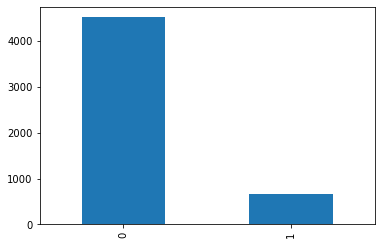

In [13]:
spam['v1'].value_counts().plot(kind='bar')

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
#환경설정
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
def preprocessing(text):   #Preprocessing
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)] 
   
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]

    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

In [16]:
spam['v2_pre']=spam['v2'].apply(lambda x: preprocessing(x))

In [17]:
spam.head()

v1                                                 v2  \
0   0  Go until jurong point, crazy.. Available only ...   
1   0                      Ok lar... Joking wif u oni...   
2   1  Free entry in 2 a wkly comp to win FA Cup fina...   
3   0  U dun say so early hor... U c already then say...   
4   0  Nah I don't think he goes to usf, he lives aro...   

                                              v2_pre  
0  jurong point crazy available bugis great world...  
1                         lar ... joking wif oni ...  
2  free entry wkly comp win cup final tkts 21st m...  
3              dun say early hor ... already say ...  
4            nah n't think go usf life around though

In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(spam['v2_pre'], spam['v1'],
                                                       test_size=0.3,  random_state=11)

In [19]:
spam.shape

(5169, 3)

In [20]:
x_train.shape

(3618,)

In [21]:
x_test.shape

(1551,)

In [22]:
x_train[0]

'jurong point crazy available bugis great world buffet ... cine got amore wat ...'

In [23]:
# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english', strip_accents='unicode', norm='l2')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [24]:
X_train.shape

(3618, 4504)

In [25]:
X_test.shape

(1551, 4504)

In [26]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB().fit(X_train, y_train)
y_predicted_NB = clf_NB.predict(X_test)

In [27]:
len(y_predicted_NB)

1551

In [28]:
y_predicted_NB[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)
y_predicted_NB = clf_NB.predict(X_test)

In [29]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier().fit(X_train, y_train)
y_predicted_DT = clf_DT.predict(X_test)

In [30]:
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
#clf_SGD = SGDClassifier(alpha=.0001, n_iter=50).fit(X_train, y_train)
clf_SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted_SGD = clf_SGD.predict(X_test)

In [31]:
# Support Vector Machines
from sklearn.svm import LinearSVC
clf_SVM = LinearSVC().fit(X_train, y_train)
y_predicted_SVM = clf_SVM.predict(X_test)

In [32]:
# The Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
clf_RFA = RandomForestClassifier(n_estimators=10)
clf_RFA.fit(X_train, y_train)
y_predicted_RFA = clf_RFA.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print (' \n confusion_matrix NB \n ')
cm = confusion_matrix(y_test, y_predicted_NB)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_NB))

 
 confusion_matrix NB 
 
[[1359    0]
 [  49  143]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1359
           1       1.00      0.74      0.85       192

    accuracy                           0.97      1551
   macro avg       0.98      0.87      0.92      1551
weighted avg       0.97      0.97      0.97      1551



In [34]:
print (' \n confusion_matrix DT \n ')
cm = confusion_matrix(y_test, y_predicted_DT)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_DT))

 
 confusion_matrix DT 
 
[[1342   17]
 [  44  148]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1359
           1       0.90      0.77      0.83       192

    accuracy                           0.96      1551
   macro avg       0.93      0.88      0.90      1551
weighted avg       0.96      0.96      0.96      1551



In [35]:
print (' \n confusion_matrix SGD \n ')
cm = confusion_matrix(y_test, y_predicted_SGD)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SGD))

 
 confusion_matrix SGD 
 
[[1351    8]
 [  24  168]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1359
           1       0.95      0.88      0.91       192

    accuracy                           0.98      1551
   macro avg       0.97      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551



In [36]:
print (' \n confusion_matrix SVM\n ')
cm = confusion_matrix(y_test, y_predicted_SVM)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SVM))

 
 confusion_matrix SVM
 
[[1355    4]
 [  24  168]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1359
           1       0.98      0.88      0.92       192

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [37]:
print (' \n confusion_matrix RFA \n ')
cm = confusion_matrix(y_test, y_predicted_RFA)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_RFA))

 
 confusion_matrix RFA 
 
[[1357    2]
 [  42  150]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1359
           1       0.99      0.78      0.87       192

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551

